# mean squared ranges resulting from from the particle model
Tim Tyree<br>
11.9.2021

In [1]:
from lib.my_initialization import *
darkmode=False
if darkmode:
    # For darkmode plots
    from jupyterthemes import jtplot
    jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

# GOAL: analyze the mean squared ranges from the particle model, evaluated at the attraction coefficients that emerged from the particle model, provided the powerlaw fits of the full models

In [82]:
import os, numpy as np
#TODO(later): restrict to only the settings with a particular positive D==0.5
input_folder="/home/timothytyree/Documents/GitHub/bgmc/python/data/bgmc_data"
os.chdir(input_folder)
input_fn_lst=["control_a_1.6_D_0.0.npz",
"control_a_1.6_D_0.3.npz",
"control_a_1.6_D_0.7.npz",
"control_a_9.5_D_0.3.npz",
# "control_a_9.5_D_0.7.csv",#interpreted by np.load as pkl...
"control_a_9.5_D_0.7.npz",
"control_a_9.5_D_0.npz"]
input_fn=input_fn_lst[2]#nabad=1]#poopoo=[0]
with np.load(input_fn) as data:
    tdeath_values=data['tdeath']
    MSR_values=data['MSR']

In [83]:
import matplotlib.pyplot as plt, pandas as pd

In [84]:
data=np.load(input_fn)
# list(data.keys()),list(data.values())
MSR_values,tdeath_values=list(data.values())

In [85]:
MSR_values

array([0.54535245, 0.54507023, 0.54518501, ..., 0.01173307, 0.01093995,
       0.00936776])

In [86]:
MSR_values

array([0.54535245, 0.54507023, 0.54518501, ..., 0.01173307, 0.01093995,
       0.00936776])


computing slope/4 for t<tmax=5.0 ms...
starting Fenton-Karma model...
D=0.0 cm^2/s yielded a=1.5968+/-0.0001 cm^2/s
D=0.3 cm^2/s yielded a=2.4069+/-0.0111 cm^2/s
D=0.7 cm^2/s yielded a=3.8663+/-0.0212 cm^2/s

computing slope/4 for t<tmax=5.0 ms...
starting Luo-Rudy model...
D=0.3 cm^2/s yielded a=10.0259+/-0.0054 cm^2/s
D=0.7 cm^2/s yielded a=10.7888+/-0.0083 cm^2/s
D=0 cm^2/s yielded a=9.4669+/-0.0010 cm^2/s
D_lst_FK=[0.0, 0.3, 0.7], D_lst_LR=[0.3, 0.7, 0]


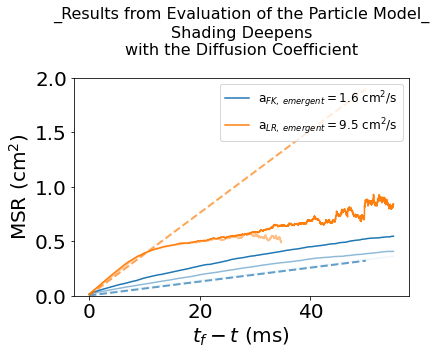

In [101]:
num_split=3#between FK and LR
Dmax=.7#parameter for alpha channel
label_fk=r'a$_{FK,\;emergent}=1.6$ cm$^2$/s'#'Fenton-Karma\n(Emergent Attraction)'
label_lr=r'a$_{LR,\;emergent}=9.5$ cm$^2$/s'#'Luo-Rudy\n(Emergent Attraction)'
# mean squared ranges resulting from from the particle model
#TODO(prioritize this for a minimalist MVP): measure the attraction coefficient of each of these values
tmax=5e-3#sec
ahat_lst_FK=[]
ahat_lst_LR=[]
Delta_ahat_lst_FK=[]
#plot FK for variable D
D_lst_FK=[]
print(f"\ncomputing slope/4 for t<tmax={tmax*1e3:.1f} ms...")
print(f"starting Fenton-Karma model...")
for n,input_fn in enumerate(input_fn_lst[:num_split]):
    data=np.load(input_fn,allow_pickle=True)
    MSR_values,tdeath_values=list(data.values())
    #parse D and shade by it
    D_string=input_fn[input_fn.find('_D_')+len('_D_'):].split('_')[0][:-4]
    D=eval(D_string)
    D_lst_FK.append(D)
    if D<Dmax-.1:
        plt.plot(tdeath_values*1e3,MSR_values,c='C0', label=None, alpha=D/Dmax+0.07)#, label='Fenton-Karma')
    else:
        plt.plot(tdeath_values*1e3,MSR_values,c='C0', label=label_fk, alpha=D/Dmax)
    #measure the attraction coefficient
    boo=tdeath_values<tmax#sec
    dict_a=compute_95CI_ols(tdeath_values[boo],MSR_values[boo])
    a_apparent=dict_a['m']/4
    Delta_a_apparent=dict_a['Delta_m']/4
    print(f"D={D} cm^2/s yielded a={a_apparent:.4f}+/-{Delta_a_apparent:.4f} cm^2/s")
    #print(f"a={a_apparent:.4f}+/-{Delta_a_apparent:.4f} cm^2/s")
    ahat_lst_FK.append(a_apparent)
    Delta_ahat_lst_FK.append(Delta_a_apparent)
print(f"\ncomputing slope/4 for t<tmax={tmax*1e3:.1f} ms...")
print(f"starting Luo-Rudy model...")
Delta_ahat_lst_LR=[]
#plot LR for variable D
D_lst_LR=[]
for n,input_fn in enumerate(input_fn_lst[num_split:]):
    data=np.load(input_fn,allow_pickle=True)
    MSR_values,tdeath_values=list(data.values())
    #parse D and shade by it
    D_string=input_fn[input_fn.find('_D_')+len('_D_'):].split('_')[0][:-4]
    D=eval(D_string)
    D_lst_LR.append(D)
    #print((input_fn,D_string))
    if D<Dmax-.1:
        plt.plot(tdeath_values*1e3,MSR_values,c='C1', label=None, alpha=D/Dmax+0.07)#, label='Luo-Rudy')
    else:
        plt.plot(tdeath_values*1e3,MSR_values,c='C1', label=label_lr, alpha=D/Dmax)
    #measure the attraction coefficient
    boo=tdeath_values<tmax#sec
    dict_a=compute_95CI_ols(tdeath_values[boo],MSR_values[boo])
    a_apparent=dict_a['m']/4
    Delta_a_apparent=dict_a['Delta_m']/4
    print(f"D={D} cm^2/s yielded a={a_apparent:.4f}+/-{Delta_a_apparent:.4f} cm^2/s")
    ahat_lst_LR.append(a_apparent)
    Delta_ahat_lst_LR.append(Delta_a_apparent)
fontsize=16
format_plot(ax=plt.gca(),xlabel=r'$t_f-t$ (ms)',ylabel=r'MSR (cm$^2$)',use_loglog=False)
plt.legend(fontsize=fontsize-4,loc='upper right')
plt.title('_Results from Evaluation of the Particle Model_\nShading Deepens\nwith the Diffusion Coefficient\n',fontsize=fontsize)

xmin=0.
xmax=50#150
# # #TODO: plot msr versus tdeath fot the full models
# # plt.plot(x_values_fk,y_values_fk,c='C0')
# # plt.fill_between(x_values_fk,y_values_fk-yerr_values_fk,y_values_fk+yerr_values_fk,color='C0',alpha=0.5)
# # plt.plot(x_values_lr,y_values_lr,c='C1')
# # plt.fill_between(x_values_lr,y_values_lr-yerr_values_lr,y_values_lr+yerr_values_lr,color='C1',alpha=0.5)
# # plt.xlim([xmin,xmax])
xv=np.linspace(xmin,xmax,100)
plt.plot(xv,xv*4*1.6e-3,'C0--',lw=2,alpha=0.7)
plt.plot(xv,xv*4*9.5e-3,'C1--',lw=2,alpha=0.7)
# # plt.xlim([0,1])
plt.ylim([0,2])
# plt.show()


print(f"D_lst_FK={D_lst_FK}, D_lst_LR={D_lst_LR}")

In [99]:
#DONE: give WJR a sensitivity analysis

In [9]:
def comp_one_over_R_xy_values(MSR_values,tdeath_values):
    '''
    Example Usage:
    x_values,y_values=comp_one_over_R_xy_values(MSR_values,tdeath_values)
    '''
    #DONE: compute x_values=one_over_R_values and y_values=dRdt_values
    R_values=np.sqrt(MSR_values)
    t_values=tdeath_values
    dRdt_values=-np.diff(R_values)/np.diff(t_values)
    one_over_R_values=1/R_values
    x_values=one_over_R_values[:-1]
    y_values=dRdt_values
    return x_values,y_values


computing slope/4 for t<tmax=5.0 ms...
starting Fenton-Karma model...
D=0.7 cm^2/s yielded a=13.0532+/-1.2677 cm^2/s
D=0.3 cm^2/s yielded a=7.8122+/-0.8414 cm^2/s
D=0.0 cm^2/s yielded a=1.5922+/-0.0001 cm^2/s

computing slope/4 for t<tmax=5.0 ms...
starting Luo-Rudy model...
D=0 cm^2/s yielded a=9.3537+/-0.0050 cm^2/s
D=0.7 cm^2/s yielded a=14.6147+/-0.9190 cm^2/s
D=0.3 cm^2/s yielded a=11.5854+/-0.5348 cm^2/s


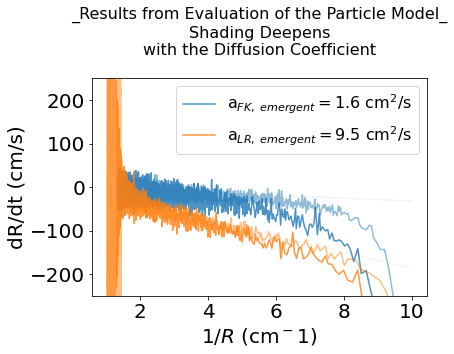

D_lst_FK=[0.7, 0.3, 0.0], D_lst_LR=[0, 0.7, 0.3]


In [10]:
#DONE: plot x_values=one_over_R_values and y_values=dRdt_values
num_split=3#between FK and LR
Dmax=.7#parameter for alpha channel
label_fk=r'a$_{FK,\;emergent}=1.6$ cm$^2$/s'#'Fenton-Karma\n(Emergent Attraction)'
label_lr=r'a$_{LR,\;emergent}=9.5$ cm$^2$/s'#'Luo-Rudy\n(Emergent Attraction)'
# mean squared ranges resulting from from the particle model
#TODO(prioritize this for a minimalist MVP): measure the attraction coefficient of each of these values
tmax=5e-3#sec
ahat_lst_FK=[]
ahat_lst_LR=[]
Delta_ahat_lst_FK=[]
#plot FK for variable D
D_lst_FK=[]
print(f"\ncomputing slope/4 for t<tmax={tmax*1e3:.1f} ms...")
print(f"starting Fenton-Karma model...")
for n,input_fn in enumerate(input_fn_lst[:num_split][::-1]):
    data=np.load(input_fn,allow_pickle=True)
    MSR_values,tdeath_values=list(data.values())
    x_values,y_values=comp_one_over_R_xy_values(MSR_values,tdeath_values)
    #parse D and shade by it
    D_string=input_fn[input_fn.find('_D_')+len('_D_'):].split('_')[0][:-4]
    D=eval(D_string)
    D_lst_FK.append(D)
    if D<Dmax-.1:
        plt.plot(x_values,y_values,c='C0', label=None, alpha=D/Dmax+0.07)#, label='Fenton-Karma')
    else:
        plt.plot(x_values,y_values,c='C0', label=label_fk, alpha=D/Dmax-.2)
    #measure the attraction coefficient
    boo=tdeath_values<tmax#sec
    dict_a=compute_95CI_ols(x_values[boo[1:]],y_values[boo[1:]])
    a_apparent=-dict_a['m']/2
    Delta_a_apparent=dict_a['Delta_m']/2
    print(f"D={D} cm^2/s yielded a={a_apparent:.4f}+/-{Delta_a_apparent:.4f} cm^2/s")
    #print(f"a={a_apparent:.4f}+/-{Delta_a_apparent:.4f} cm^2/s")
    ahat_lst_FK.append(a_apparent)
    Delta_ahat_lst_FK.append(Delta_a_apparent)
print(f"\ncomputing slope/4 for t<tmax={tmax*1e3:.1f} ms...")
print(f"starting Luo-Rudy model...")
Delta_ahat_lst_LR=[]
#plot LR for variable D
D_lst_LR=[]
for n,input_fn in enumerate(input_fn_lst[num_split:][::-1]):
    data=np.load(input_fn,allow_pickle=True)
    MSR_values,tdeath_values=list(data.values())
    x_values,y_values=comp_one_over_R_xy_values(MSR_values,tdeath_values)
    #parse D and shade by it
    D_string=input_fn[input_fn.find('_D_')+len('_D_'):].split('_')[0][:-4]
    D=eval(D_string)
    D_lst_LR.append(D)
    #print((input_fn,D_string))
    if D<Dmax-.1:
        plt.plot(x_values,y_values,c='C1', label=None, alpha=D/Dmax+0.07)#, label='Luo-Rudy')
    else:
        plt.plot(x_values,y_values,c='C1', label=label_lr, alpha=D/Dmax-.2)
    #measure the attraction coefficient
    boo=tdeath_values<tmax#sec
    dict_a=compute_95CI_ols(x_values[boo[1:]],y_values[boo[1:]])
    a_apparent=-dict_a['m']/2
    Delta_a_apparent=dict_a['Delta_m']/2
    print(f"D={D} cm^2/s yielded a={a_apparent:.4f}+/-{Delta_a_apparent:.4f} cm^2/s")
    ahat_lst_LR.append(a_apparent)
    Delta_ahat_lst_LR.append(Delta_a_apparent)
fontsize=16
format_plot(ax=plt.gca(),xlabel=r'$1/R$ (cm$^-1$)',ylabel=r'dR/dt (cm/s)')
plt.ylim([-250,250])
plt.legend(fontsize=fontsize,loc='upper right')
plt.title('_Results from Evaluation of the Particle Model_\nShading Deepens\nwith the Diffusion Coefficient\n',fontsize=fontsize)
plt.show()
print(f"D_lst_FK={D_lst_FK}, D_lst_LR={D_lst_LR}")

# continuing with the squared range method...

In [11]:
#TODO: plot ahat versus D for various a using the set of .csv's / pickel files

In [12]:
#GOAL 4 TONIGHT: get a minimum viable product to not be completely discounted by WJR!!! :,(
#DONE: get ^these cloud MSR_values to plot reasonably
#TODO: import MSR_values_FK
#TODO: import MSR_values_LR
#TODO: plot all of these and put it in a pdf
#TODO: polish ^that pdf for awhile.  
# HINT: consider looking at the following TODO...
#TODO: share that pdf before going to bed!!!!

In [13]:
print(D_lst_FK,D_lst_LR)
#TODO(after plotting full model MSR_values): measure slopes as small time

[0.7, 0.3, 0.0] [0, 0.7, 0.3]


In [14]:
# Later, on remote from ssh-miller
#TODO(later): search how to push to git from command line in cheatsheets
#TODO?: git checkout bgmc 
#TODO: git push bgmc 

In [15]:
#FK (fine resolution)
input_folder="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200"
os.chdir(input_folder)
#msd
input_fn_lst=[
    "bootstrapped_msd_time_bins_auto.csv",
    "bootstrapped_msd_time_bins_30.csv",
    "bootstrapped_msd_particle_bins_auto.csv",
    "bootstrapped_msd_particle_bins_30.csv",
    "bootstrapped_msd_bins_30.csv",
]
#annihilations
input_fn_lst2=[
    "annihilations_mindur_50_maxdur_150_minrange_0.5_rangethresh_0.1_mean_radial_velocities_bins_30_minRthresh_0.25_maxspeedthresh_0.2.csv",
    #backups
    "annihilations_mindur_50_maxdur_150_minrange_0.5_rangethresh_0.1_mean_radial_velocities_bins_30_minRthresh_0.25_maxspeedthresh_0.4.csv",
    "annihilations_mindur_50_maxdur_150_minrange_0.5_rangethresh_0.1_mean_radial_velocities_bins_auto_minRthresh_0.25_maxspeedthresh_0.4.csv",
    "annihilations_mindur_50_maxdur_150_minrange_0.5_rangethresh_0.1_mean_radial_velocities_bins_30.csv",
    #200MB backup
    "annihilations_mindur_50_maxdur_150_minrange_0.5_rangethresh_0.1.csv",
]

In [16]:
#LR
input_folder="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5"
os.chdir(input_folder)
#msd
input_fn_lst=[
    "bootstrapped_msd_particle_bins_auto.csv",
    "bootstrapped_msd_particle_bins_30.csv",#unsure newer
    "bootstrapped_msd_time_bins_30.csv",#unsure newest
]
#annihilations
input_fn_lst2=[
    "annihilations_minr_1.0_mindur_20.0_mean_radial_velocities_bins_20.csv",
    #backups
    "annihilations_mean_radial_velocities_bins_30_minRthresh_0.25_maxspeedthresh_0.2.csv",
    "annihilations_minr_1.0_mindur_20.0_mean_radial_velocities_bins_30.csv"
    
]

In [17]:
#GOAL(immediate): plot a reasonable pair of FK and LR in matplotlib

In [18]:
input_fn=input_fn_lst[0]
df=pd.read_csv(input_fn)
df.head()

,lagt_sec,msd_cm2,Delta_msd_cm2,hat_msd_cm2
0,0.00875,0.037280,0.004748,0.285434
1,0.02675,0.129562,0.010235,0.288081
2,0.04475,0.279681,0.014879,0.290728
3,0.06250,0.331354,0.017851,0.293338
4,0.08025,0.251670,0.016008,0.295948


In [19]:
#TODO: find input_fn_lst3=[<MSR vs. tdeath>]
#NOTE: input_fn="annihilations_minr_1.0_mindur_20.0_mean_radial_velocities_bins_30.csv"
#### has been bootstrap....
#TODO: plot dRdt vs. 1/R anyway because it is convenient
#TODO: DO NOT try to use dRdt vs. 1/R to compute MSR vs. tf-t...
input_fn=input_fn_lst2[2]
df2=pd.read_csv(input_fn)
print(input_fn)
df2.head()

annihilations_minr_1.0_mindur_20.0_mean_radial_velocities_bins_30.csv


,r,drdt,Delta_r,Delta_drdt,p_r,p_drdt,counts
0,0.184688,-0.045334,0.001653,0.005567,0.908974,1.892704e-11,1463
1,0.299767,-0.022354,0.001064,0.003130,0.498364,5.796078e-07,3541
2,0.409397,-0.016099,0.000919,0.002319,0.533995,3.071377e-09,4969
3,0.526260,-0.013925,0.000932,0.001689,0.351052,8.473125e-02,4970
4,0.643886,-0.013311,0.000908,0.001691,0.470987,3.049264e-02,5085


In [20]:
#DONE: compute the time step explicitely using r/drdt=dt
#ANSWER: ^that looks horrible...?
df2['r'].diff().shift(1)/df2['drdt']

0             NaN
1             NaN
2       -7.148332
3       -7.872967
4       -8.779583
5      -11.643352
6      -13.264533
7      -19.020438
8      -21.476799
9      -17.777427
10     -22.567225
11     -21.320556
12     -19.420089
13     -27.621869
14     -43.167255
15    -154.878633
16     -25.615752
17     -30.949406
18     -38.887657
19     183.768019
20    -334.777025
21    -263.903775
22     -51.290138
23    -707.379623
24     -41.731651
25   -1023.438654
dtype: float64

In [21]:
df2.shape

(26, 7)

In [22]:
#GOAL: find input_fn_lst3=[<MSR vs. tdeath>] for full models


# A sensitivity analysis of estimates of known values of the attraction coefficient are quantified.
GOAL:

#measure the effect of diffusion coefficient on the apparenet attraction coefficient

In [23]:
import os, numpy as np
#TODO(later): restrict to only the settings with a particular positive D==0.5
input_folder="/home/timothytyree/Documents/GitHub/bgmc/python/data/bgmc_data"
os.chdir(input_folder)
input_fn_lst=[x for x in os.listdir() if x[-4:]=='.csv']
print(*input_fn_lst)

control_a_9.5_D_1.0.csv control_a_9.5_D_2.8.csv control_a_9.5_D_0.4.csv control_a_9.5_D_1.4.csv control_a_1.6_D_1.4.csv control_a_9.5_D_3.0.csv control_a_9.5_D_2.2.csv control_a_1.6_D_1.6.csv control_a_5_D_0.5.csv control_a_5_D_3.0.csv control_a_1.6_D_0.8.csv control_a_1_D_0.5.csv control_a_1.6_D_1.8.csv control_a_9.5_D_0.2.csv control_a_1.6_D_2.6.csv control_a_1.6_D_1.2.csv control_a_5_D_2.5.csv control_a_1_D_1.0.csv control_a_9.5_D_0.0.csv control_a_9.5_D_2.0.csv control_a_1.6_D_2.2.csv control_a_9.5_D_0.6.csv control_a_1.6_D_1.0.csv control_a_9.5_D_1.6.csv control_a_9.5_D_0.7.csv control_a_9.5_D_0.8.csv control_a_9.5_D_2.4.csv control_a_1.6_D_0.7.csv control_a_5_D_1.5.csv control_a_1.6_D_0.2.csv control_a_1.6_D_2.4.csv control_a_5_D_0.0.csv control_a_9.5_D_1.2.csv control_a_9.5_D_1.8.csv control_a_1.6_D_2.8.csv control_a_1.6_D_3.0.csv control_a_1_D_0.0.csv control_a_9.5_D_2.6.csv control_a_1.6_D_0.4.csv control_a_5_D_2.0.csv control_a_1.6_D_0.6.csv control_a_5_D_1.0.csv control_a_1.

In [24]:
tavg1=0 #ms or sec??
tavg2=0 #TODO: vary tavg1,2 after quantifying the trivial case...
#TODO(later): for each of ^these
printing=True
#extract a and D from input_fn
#this will fail if the last parameter isn't D
ahat_lst=[]
a_lst=[]
D_lst=[]
ahat_lst=[]
Delta_ahat_lst=[]
Rsq_ahat_lst=[]
print(f"parsing folder of .csv files...")
for input_fn in input_fn_lst:
    assert ( os.path.exists(input_fn))
    df=pd.read_csv(input_fn) \
        .dropna()
    #parse input_fn
    D_string=input_fn[input_fn.find('_D_')+len('_D_'):].split('_')[0][:-4]
    D=eval(D_string)
    a_string=input_fn[input_fn.find('_a_')+len('_a_'):].split('_')[0]#.split('.')[:-4]
    a=eval(a_string)
    #compute ahat
    boo=df['tmax']==0.005# sec
    boo&=df['tavg1']==tavg1
    boo&=df['tavg2']==tavg2
    #collect the unfiltered ahat
    ahat,Delta_ahat,Rsq_ahat=df[boo][['a','Delta_a','Rsq_a']].values.T
    ahat=float(ahat)
    Delta_ahat=float(Delta_ahat)
    Rsq_ahat=float(Rsq_ahat);
    #record
    a_lst.append(a)    
    D_lst.append(D)
    ahat_lst.append(ahat)
    Delta_ahat_lst.append(Delta_ahat)
    Rsq_ahat_lst.append(Rsq_ahat)  
    if printing:
        print(f"D={D}\ta={a}\t-->\tahat={(ahat):.4f}\t+/-{Delta_ahat:.4f}\tRsq={Rsq_ahat:.2f})")

parsing folder of .csv files...
D=1.0	a=9.5	-->	ahat=11.3202	+/-0.0116	Rsq=1.00)
D=2.8	a=9.5	-->	ahat=14.7778	+/-0.0610	Rsq=1.00)
D=0.4	a=9.5	-->	ahat=10.3356	+/-0.0035	Rsq=1.00)
D=1.4	a=9.5	-->	ahat=12.0932	+/-0.0219	Rsq=1.00)
D=1.4	a=1.6	-->	ahat=6.1243	+/-0.0431	Rsq=0.99)
D=3.0	a=9.5	-->	ahat=15.2902	+/-0.0988	Rsq=0.99)
D=2.2	a=9.5	-->	ahat=13.4610	+/-0.0722	Rsq=1.00)
D=1.6	a=1.6	-->	ahat=6.8939	+/-0.0435	Rsq=0.99)
D=0.5	a=5	-->	ahat=6.0076	+/-0.0062	Rsq=1.00)
D=3.0	a=5	-->	ahat=12.0821	+/-0.0726	Rsq=1.00)
D=0.8	a=1.6	-->	ahat=4.2035	+/-0.0289	Rsq=0.99)
D=0.5	a=1	-->	ahat=2.8841	+/-0.0215	Rsq=0.99)
D=1.8	a=1.6	-->	ahat=7.5470	+/-0.0418	Rsq=1.00)
D=0.2	a=9.5	-->	ahat=9.8204	+/-0.0030	Rsq=1.00)
D=2.6	a=1.6	-->	ahat=10.0191	+/-0.0579	Rsq=1.00)
D=1.2	a=1.6	-->	ahat=5.7486	+/-0.0334	Rsq=1.00)
D=2.5	a=5	-->	ahat=11.1215	+/-0.0483	Rsq=1.00)
D=1.0	a=1	-->	ahat=4.6231	+/-0.0330	Rsq=0.99)
D=0.0	a=9.5	-->	ahat=9.4669	+/-0.0010	Rsq=1.00)
D=2.0	a=9.5	-->	ahat=13.3798	+/-0.0348	Rsq=1.00)
D=2.2	a=

In [25]:
#TODO: form a DataFrame
df_out=pd.DataFrame(dict(
    a=a_lst,
    D=D_lst,
    ahat=ahat_lst,
    Delta_ahat=Delta_ahat_lst,
    Rsq_ahat=Rsq_ahat_lst
))
df_out.head()

,a,D,ahat,Delta_ahat,Rsq_ahat
0,9.5,1.0,11.320218,0.011626,0.999863
1,9.5,2.8,14.777819,0.061033,0.997789
2,9.5,0.4,10.335558,0.003535,0.999985
3,9.5,1.4,12.093179,0.021874,0.999575
4,1.6,1.4,6.124319,0.043144,0.993595


for a, 1.0 cm^2/s yielded da/dD=1.5968+/-0.0001
for a, 1.6 cm^2/s yielded da/dD=1.5968+/-0.0001
for a, 5.0 cm^2/s yielded da/dD=1.5968+/-0.0001
for a, 9.5 cm^2/s yielded da/dD=1.5968+/-0.0001


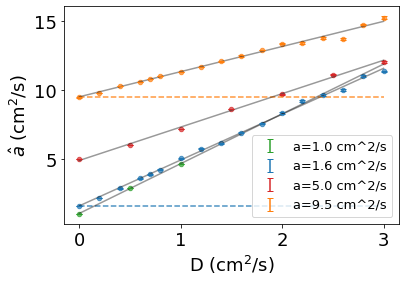

In [26]:
#TODO: plot ^those lists in one Figure (for SM)
#measure the effect of diffusion coefficient on the apparent attraction coefficient
#color/group by a
fontsize=18

#TODO: plot a_emergent as a horizontal dotted line
a_groups=df_out.groupby('a')
xv=np.linspace(0,3,100)
for nga,g in a_groups:
    if nga==1.6 or nga==9.5:
        plt.plot(xv,0.*xv+nga,'--',alpha=0.8)#,label=f'a={nga} cm^2/s')        
    
a_lst=[]
da_hatdD_lst=[]
Delta_da_hatdD_lst=[]
c_lst=['C2','C0','C3','C1']
for c, (nga,g) in zip(c_lst,a_groups):
    x=g['D'].values
    y=g['ahat'].values
    yerror=g['Delta_ahat']
    #if we have at least minobs
    minobs=2
    if y.shape[-1]>minobs:
        #fit linear curve
        dict_ahat=compute_95CI_ols(x,y)
        m=dict_ahat['m']
        Delta_m=dict_ahat['Delta_m']
        #record
        da_hatdD_lst.append(m)
        Delta_da_hatdD_lst.append(Delta_m)
        a_lst.append(nga)
        print(f"for a, {nga} cm^2/s yielded da/dD={ahat:.4f}+/-{Delta_ahat:.4f}")
        #plot linear fit
        yv=m*xv+dict_ahat['b']
        plt.plot(xv,yv,'k-',alpha=0.4)
    
    
    plt.scatter(x,y,s=20,alpha=0.7,c=c)
    plt.errorbar(x, y, yerr=yerror, ls = 'none',capsize=3,label=f'a={nga} cm^2/s',color=c)
plt.legend(fontsize=fontsize-5,loc='lower right')
format_plot(ax=plt.gca(),xlabel=r'D (cm$^2$/s)',ylabel=r'$\hat{a}$ (cm$^2$/s)',fontsize=fontsize)
plt.show()

m=-0.20711175630031886
Delta_m=0.0586264132696847
b=3.691874402904524
Delta_b=0.31951395231978164
Rsquared=0.959955214451371


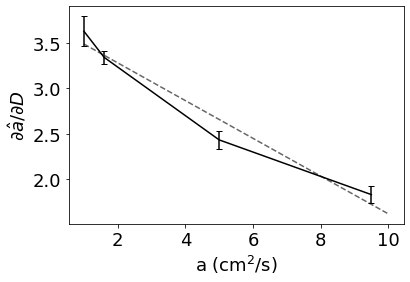

In [38]:
x=np.array(a_lst)
y=np.array(da_hatdD_lst)
yerr=np.array(Delta_da_hatdD_lst)
#OLS fit
dict_sensitivity=compute_95CI_ols(x,y)
m=dict_sensitivity['m']
Delta_m=dict_sensitivity['Delta_m']
b=dict_sensitivity['b']
Delta_b=dict_sensitivity['Delta_b']
#print OLS fit
print_dict(dict_sensitivity)

#plot apparent sensitivities
plt.plot(x,y,'k')
plt.errorbar(x, y, yerr=yerr, ls = 'none',capsize=3,color='k')

#plot OLS fit
xv=np.linspace(1,10,20)
yv=m*xv+b
plt.plot(xv,yv,'k--',alpha=0.6)
#TODO(later): #label plot with equation for OLS fit
# eq1 = (r"\begin{eqnarray*}"
#        r"|\nabla\phi| &=& 1,\\"
#        r"\frac{\partial \phi}{\partial t} + U|\nabla \phi| &=& 0 "
#        r"\end{eqnarray*}")
# ax=plt.gca()
# ax.text(1, 0.9, eq1, color="C2", fontsize=18,
#         horizontalalignment="right", verticalalignment="top")
format_plot(ax=plt.gca(),xlabel=r'a (cm$^2$/s)',ylabel=r'$\partial\hat{a}/\partial D$',
            fontsize=fontsize,use_loglog=False)
plt.show()

m=-0.3000603856749984
Delta_m=0.05983991334426686
b=1.3215942589126104
Delta_b=0.08398670174135657
Rsquared=0.9797146712581203


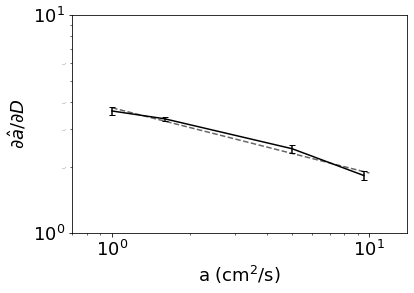

In [42]:
x=np.array(a_lst)
y=np.array(da_hatdD_lst)
yerr=np.array(Delta_da_hatdD_lst)
#OLS fit
dict_sensitivity=compute_95CI_ols(np.log(x),np.log(y))
m=dict_sensitivity['m']
Delta_m=dict_sensitivity['Delta_m']
b=dict_sensitivity['b']
Delta_b=dict_sensitivity['Delta_b']
#print OLS fit
print_dict(dict_sensitivity)

#plot apparent sensitivities
plt.plot(x,y,'k')
plt.errorbar(x, y, yerr=yerr, ls = 'none',capsize=3,color='k')

#plot OLS fit
xv=np.linspace(1,10,20)
yv=np.exp(m*np.log(xv)+b)
plt.plot(xv,yv,'k--',alpha=0.6)
format_plot(ax=plt.gca(),xlabel=r'a (cm$^2$/s)',ylabel=r'$\partial\hat{a}/\partial D$',
            fontsize=fontsize,use_loglog=True)
plt.xlim([.7,14])
plt.ylim([1,10])
plt.show()

In [28]:
# import numpy as np
# import matplotlib
# matplotlib.rcParams['text.usetex'] = True
# import matplotlib.pyplot as plt

In [29]:
# import numpy as np
# import matplotlib
# matplotlib.rcParams['text.usetex'] = True
# import matplotlib.pyplot as plt


# t = np.linspace(0.0, 1.0, 100)
# s = np.cos(4 * np.pi * t) + 2

# fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
# ax.plot(t, s)

# ax.set_xlabel(r'\textbf{time (s)}')
# ax.set_ylabel('\\textit{Velocity (\N{DEGREE SIGN}/sec)}', fontsize=16)
# ax.set_title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
#              r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')

In [30]:
# #TODO: plot ^those lists in one Figure (for SM)
# #TODO: color/group by a
# a_groups=df_out.groupby('a')
# for ng,g in a_groups:
#     #TODO: extract xy values, where x=D and y=ahat
#     g.sort_values(by='D',inplace=True)
#     g.plot(x='D',y='ahat')
# plt.show()

In [31]:
# #for a given a,D .csv save.  visualize it in each of its free parameters
# assert ( os.path.exists(input_fn))
# df=pd.read_csv(input_fn) \
#     .dropna()
# df.head()

In [43]:
#GOAL: collect the unfiltered ahat as a function of D conditioned on a=a


# plot MSR from the full models

In [78]:
#archived
msr_dir_fk="/home/timothytyree/Documents/GitHub/bgmc/python/data/full_results/annihilation_data_fk_msr.csv"
msr_dir_lr="/home/timothytyree/Documents/GitHub/bgmc/python/data/full_results/annihilation_data_lr_msr.csv"
df_fk=pd.read_csv(msr_dir_fk)
df_lr=pd.read_csv(msr_dir_lr)

In [79]:
df_fk.head()

In [80]:
df_lr.head()

In [77]:
#TODO: plot ^those resulting df_msr versus tdeath
df_fk.sort_values(by='tdeath',inplace=True)
df_lr.sort_values(by='tdeath',inplace=True)
x_values_fk=df_fk['tdeath'].values
y_values_fk=df_fk['sqavg'].values
yerr_values_fk=df_fk['sqstderror'].values

x_values_lr=df_lr['tdeath'].values
y_values_lr=df_lr['sqavg'].values
yerr_values_lr=df_lr['sqstderror'].values

#DONT/TODO: worry about the slope for now?

#TODO: plot ^those resulting df_msr versus tdeath
plt.scatter(x_values_fk,y_values_fk,c='C0')
plt.fill_between(x_values_fk,y_values_fk-yerr_values_fk,y_values_fk+yerr_values_fk,color='C0',alpha=0.5)
plt.scatter(x_values_lr,y_values_lr,c='C1')
plt.fill_between(x_values_lr,y_values_lr-yerr_values_lr,y_values_lr+yerr_values_lr,color='C1',alpha=0.5)
format_plot(ax=plt.gca(),xlabel=r'$t_f-t$ (s)',ylabel=r'MSR (cm$^2$)')
# plt.xlim([0,.05])
#plt.xlim([0,2])
plt.show()

In [61]:
np.max(x_values)

1.9219459009411768

In [52]:
# num_split=3#between FK and LR
# Dmax=.7#parameter for alpha channel
label_fk=r'a$_{FK,\;emergent}=1.6$ cm$^2$/s'#'Fenton-Karma\n(Emergent Attraction)'
label_lr=r'a$_{LR,\;emergent}=9.5$ cm$^2$/s'#'Luo-Rudy\n(Emergent Attraction)'
# mean squared ranges resulting from from the particle model
#TODO(prioritize this for a minimalist MVP): measure the attraction coefficient of each of these values
tmax=5e-3#sec
ahat_lst_FK=[]
ahat_lst_LR=[]
Delta_ahat_lst_FK=[]
#plot FK for variable D
D_lst_FK=[]
print(f"\ncomputing slope/4 for t<tmax={tmax*1e3:.1f} ms...")
print(f"starting Fenton-Karma model...")
for n,input_fn in enumerate(input_fn_lst[:num_split]):
    data=np.load(input_fn,allow_pickle=True)
    MSR_values,tdeath_values=list(data.values())
    #parse D and shade by it
    D_string=input_fn[input_fn.find('_D_')+len('_D_'):].split('_')[0][:-4]
    D=eval(D_string)
    D_lst_FK.append(D)
    if D<Dmax-.1:
        plt.plot(tdeath_values*1e3,MSR_values,c='C0', label=None, alpha=D/Dmax+0.07)#, label='Fenton-Karma')
    else:
        plt.plot(tdeath_values*1e3,MSR_values,c='C0', label=label_fk, alpha=D/Dmax)
    #measure the attraction coefficient
    boo=tdeath_values<tmax#sec
    dict_a=compute_95CI_ols(tdeath_values[boo],MSR_values[boo])
    a_apparent=dict_a['m']/4
    Delta_a_apparent=dict_a['Delta_m']/4
    print(f"D={D} cm^2/s yielded a={a_apparent:.4f}+/-{Delta_a_apparent:.4f} cm^2/s")
    #print(f"a={a_apparent:.4f}+/-{Delta_a_apparent:.4f} cm^2/s")
    ahat_lst_FK.append(a_apparent)
    Delta_ahat_lst_FK.append(Delta_a_apparent)
print(f"\ncomputing slope/4 for t<tmax={tmax*1e3:.1f} ms...")
print(f"starting Luo-Rudy model...")
Delta_ahat_lst_LR=[]
#plot LR for variable D
D_lst_LR=[]
for n,input_fn in enumerate(input_fn_lst[num_split:]):
    data=np.load(input_fn,allow_pickle=True)
    MSR_values,tdeath_values=list(data.values())
    #parse D and shade by it
    D_string=input_fn[input_fn.find('_D_')+len('_D_'):].split('_')[0][:-4]
    D=eval(D_string)
    D_lst_LR.append(D)
    #print((input_fn,D_string))
    if D<Dmax-.1:
        plt.plot(tdeath_values*1e3,MSR_values,c='C1', label=None, alpha=D/Dmax+0.07)#, label='Luo-Rudy')
    else:
        plt.plot(tdeath_values*1e3,MSR_values,c='C1', label=label_lr, alpha=D/Dmax)
    #measure the attraction coefficient
    boo=tdeath_values<tmax#sec
    dict_a=compute_95CI_ols(tdeath_values[boo],MSR_values[boo])
    a_apparent=dict_a['m']/4
    Delta_a_apparent=dict_a['Delta_m']/4
    print(f"D={D} cm^2/s yielded a={a_apparent:.4f}+/-{Delta_a_apparent:.4f} cm^2/s")
    ahat_lst_LR.append(a_apparent)
    Delta_ahat_lst_LR.append(Delta_a_apparent)
fontsize=16
format_plot(ax=plt.gca(),xlabel=r'$t_f-t$ (ms)',ylabel=r'MSR (cm$^2$)')
plt.legend(fontsize=fontsize-4,loc='lower right')
plt.title('_Results from Evaluation of the Particle Model_\nShading Deepens\nwith the Diffusion Coefficient\n',fontsize=fontsize)
plt.show()
print(f"D_lst_FK={D_lst_FK}, D_lst_LR={D_lst_LR}")


computing slope/4 for t<tmax=5.0 ms...
starting Fenton-Karma model...


FileNotFoundError: [Errno 2] No such file or directory: 'control_a_9.5_D_1.0.csv'

In [58]:
# #TODO: analyze a_hat from ^that
# #TODO: repeat for various tavg1 and tavg2
# # #HINT: 
# from ...care.notebooks.lib import *
# # df=pd.read_csv(input_fn)
# # DT=np.around(get_DT(df),7)
# # print(f"DT={DT} ms")
# # retval=routine_postprocess_trajectory_folder(input_fn,DT,tavg1=4, tavg2=24,
# #                                         max_dtmax_thresh = 0,      #ms
# #                                         max_Rfinal_thresh = 0.2,   #cm
# #                                         min_duration_thresh = 40,  #ms
# #                                         npartitions=None,
# #                                         width=200,
# #                                         height=200,
# #                                         ds=5,
# #                                         use_drop_shorter_than=True,
# #                                         drop_shorter_than=40, #ms
# #                                         tmin=100., #ms
# #                                         pid_col='particle',
# #                                         t_col='t',
# #                                         printing=False)
# # save_dir_lst,save_dir_lst2=retval